# 7회차: CNN을 활용한 컬러 이미지 분류 (1) – 개념 및 기본 모델

In [ ]:
%config InlineBackend.figure_format = 'retina'

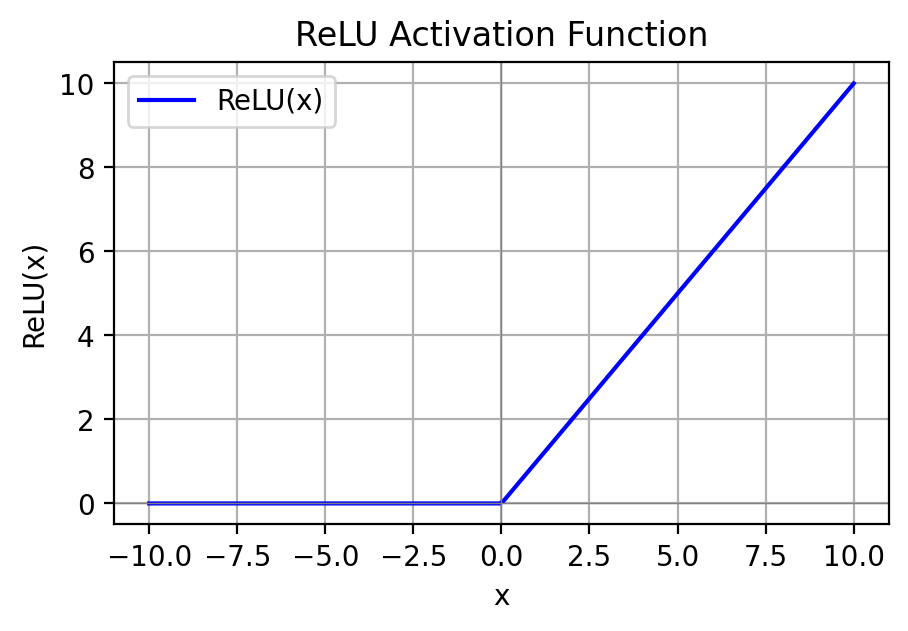

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 데이터 생성: -10부터 10까지 0.1 간격
x = np.linspace(-10, 10, 200)

# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# ReLU 적용
y = relu(x)

# 시각화
plt.figure(figsize=(5, 3))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.show()

### CIFAR-10 데이터셋

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# 1. 변환 정의
transform = transforms.ToTensor()

# 2. CIFAR-10 데이터셋 불러오기
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 3. 데이터셋 통계
total_train = len(trainset)
total_test = len(testset)
class_names = trainset.classes  # 클래스 이름

# 4. 이미지 하나 꺼내서 shape 확인
sample_image, sample_label = trainset[0]
image_shape = sample_image.shape  # torch.Size([3, 32, 32])

# 5. 출력
print("CIFAR-10 Dataset 정보")
print(f"Train Set Size: {total_train}장")
print(f"Test Set Size: {total_test}장")
print(f"총 이미지 수: {total_train + total_test}장")
print(f"클래스 수: {len(class_names)}개")
print("클래스 목록:", class_names)
print(f"예시 이미지 크기: {image_shape} (채널, 높이, 너비)")
print(f"예시 이미지 라벨: {sample_label} ({class_names[sample_label]}) ")

100%|██████████| 170M/170M [00:03<00:00, 49.3MB/s]


CIFAR-10 Dataset 정보
Train Set Size: 50000장
Test Set Size: 10000장
총 이미지 수: 60000장
클래스 수: 10개
클래스 목록: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
예시 이미지 크기: torch.Size([3, 32, 32]) (채널, 높이, 너비)
예시 이미지 라벨: 6 (frog) 


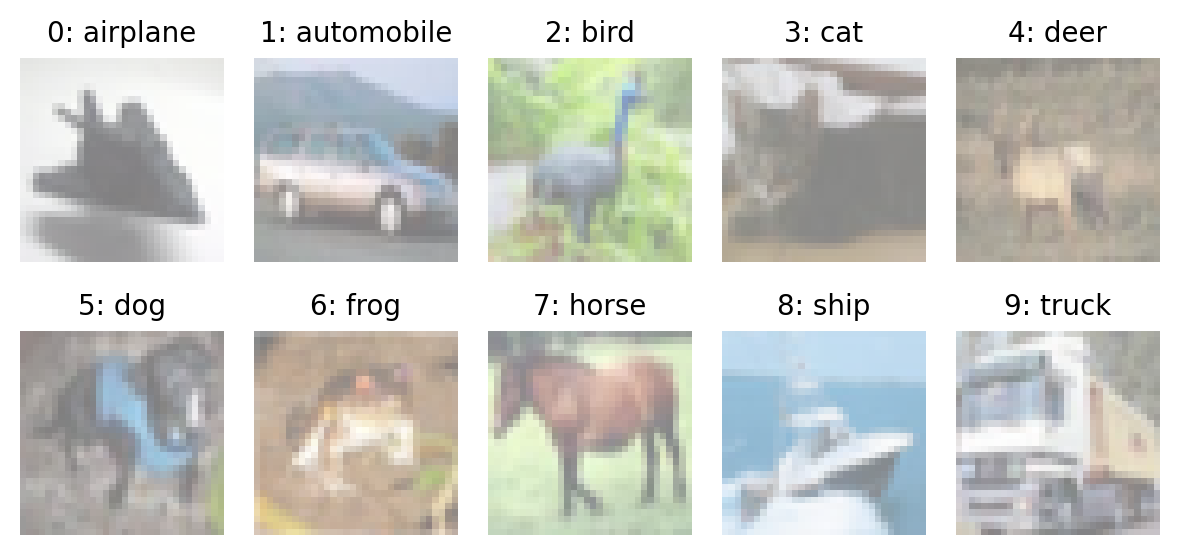

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch

# 1. CIFAR-10 데이터셋 불러오기
transform = transforms.ToTensor()
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# 2. 클래스 이름과 초기화
class_names = trainset.classes
class_found = [False] * 10
images_to_show = [None] * 10

# 3. 각 클래스(0~9)마다 하나씩 이미지 수집
for image, label in trainset:
    if not class_found[label]:
        images_to_show[label] = image
        class_found[label] = True
    if all(class_found):
        break

# 4. 시각화: 2행 5열에 클래스 번호와 이름 함께 표시
plt.figure(figsize=(6, 3))
for i in range(10):
    img = images_to_show[i].permute(1, 2, 0)  # (C, H, W) → (H, W, C)
    img = img * 0.5 + 0.5  # 정규화 해제

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"{i}: {class_names[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

### alexnet

In [ ]:
import torchvision.models as models
from torchvision.models import AlexNet_Weights

model = models.alexnet(weights=AlexNet_Weights.DEFAULT)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 종료